In [7]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import os
import cv2

import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
#import segmentation_models_pytorch as smp

In [8]:
import tensorflow as tf

In [9]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization

In [10]:
# from tensorflow.keras.layers.convolutional import Conv2D
# from tensorflow.keras.layers.pooling import GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D

In [11]:
# from keras.models import Sequential 
# from keras.layers import Activation, Flatten
# from keras.layers import Dense, Dropout

In [12]:
# from keras.models import Sequential
# from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D

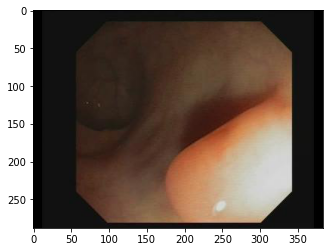

In [13]:
# Display a sample image
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [14]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    return image

### Save Each Filepath and Filename into List for Each Image

In [15]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
file_annot_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for file_name in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/"):
    if file_name.endswith(".xml"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/", file_name)
        file_annot_list.append([filepath, file_name])


### Read and Save Each Image into Image List

In [16]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

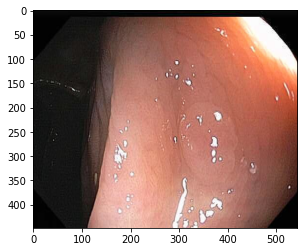

In [17]:
plt.imshow(image_list[0])

### Read and Save Each Annotation into Annotation List

In [18]:
annotation_list = []
for file in file_annot_list:
    annot = file[0]
    annotation_list.append(annot)

In [19]:
# Finding the specific annotation in the xml file
a_list = []
for i in range(28773):
    tree = ET.parse(annotation_list[i])
    root = tree.getroot()
    object = root.find("object")
    if(object):
        polyp_name = object.find("name").text
        a_list.append(polyp_name)
    else:
        a_list.append("Not Specified")

In [20]:
# Finding the unique elements in the list
x = np.array(a_list)
print(np.unique(x))

['Not Specified' 'adenomatous' 'hyperplastic']


In [21]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (100, 100)) # Resizing the image to 224x224 dimention
    return (image)

In [22]:
im_list = []
for i in image_list:
    im_list.append(scale_resize_image(i))  

2022-05-08 08:58:32.772627: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-08 08:58:32.776995: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


## Train Test Split

In [23]:
im_list_new = np.array(im_list[:100])
type(im_list_new)

numpy.ndarray

In [24]:
a_list_new = np.array(a_list[:100])
type(a_list_new)

numpy.ndarray

In [25]:
print(len(im_list_new))
print(len(a_list_new))

100
100


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
y = le.fit_transform(a_list_new)

In [28]:
X = im_list_new

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Unet Implementation

In [83]:
len_classes=3
dropout_rate=0.2
cnn_model = Sequential()
cnn_model.add(Lambda(lambda img: (img/255.0)-0.5, input_shape=(100, 100, 3)))

cnn_model.add(Conv2D(filters=8, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=8, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=128, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=128, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=16, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=8, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=8, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=8, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))

cnn_model.add(Conv2D(filters=len_classes, kernel_size=1, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(GlobalMaxPooling2D())
cnn_model.add(Activation("softmax"))

In [84]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 98, 98, 8)         224       
_________________________________________________________________
dropout_59 (Dropout)         (None, 98, 98, 8)         0         
_________________________________________________________________
batch_normalization_59 (Batc (None, 98, 98, 8)         32        
_________________________________________________________________
activation_54 (Activation)   (None, 98, 98, 8)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
dropout_60 (Dropout)         (None, 96, 96, 8)        

In [85]:
cnn_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [86]:
#validation_split=0.1, batch_size=8,
cnn_model.fit(X_train, y_train,epochs=30)

Train on 80 samples
Epoch 1/30
80/80 [==============================] - 45s 560ms/sample - loss: 0.9828 - accuracy: 0.5125
Epoch 2/30
80/80 [==============================] - 41s 513ms/sample - loss: 1.0193 - accuracy: 0.4625
Epoch 3/30
80/80 [==============================] - 43s 538ms/sample - loss: 0.9543 - accuracy: 0.4625
Epoch 4/30
80/80 [==============================] - 43s 539ms/sample - loss: 1.1173 - accuracy: 0.4500
Epoch 5/30
80/80 [==============================] - 44s 545ms/sample - loss: 0.9024 - accuracy: 0.5250
Epoch 6/30
80/80 [==============================] - 42s 531ms/sample - loss: 1.0066 - accuracy: 0.5000
Epoch 7/30
80/80 [==============================] - 43s 537ms/sample - loss: 0.8938 - accuracy: 0.5750
Epoch 8/30
80/80 [==============================] - 42s 530ms/sample - loss: 0.8967 - accuracy: 0.5500
Epoch 9/30
80/80 [==============================] - 42s 528ms/sample - loss: 0.9178 - accuracy: 0.5125
Epoch 10/30
80/80 [==============================] - 

In [87]:
loss, accuracy  = cnn_model.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.11851966381073
accuracy:  0.1
